In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

def image_plot(data, title='FITS image'):
    plt.figure(figsize=(10,10))
    im = plt.imshow(data, cmap=plt.cm.afmhot, interpolation=None)
    plt.title(title)
    #plt.axis('off')
    divider = make_axes_locatable(plt.gca())
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)
    plt.show()

In [3]:
# first we load the data:
data = np.load("orion.npy")

### Paso 1) 

Calcular el `RMS` de la imagen entregada. 

$$RMS = \sqrt{\frac{1}{m\ n} \sum_{i=1}^m \sum_{j=1}^n \texttt{data[i,j]}^2}$$

__Nota:__ Computarlo de forma vectorizada.

In [115]:
def RMS(data):
    return (np.dot(data.ravel(), data.ravel())/data.size)**0.5   

### Paso 2) 

Genere otro arreglo donde los pixeles con intensidades por debajo del `RMS` son considerados como _no usables_ (con valor `=0`).  Mostrar tal imagen resultante.

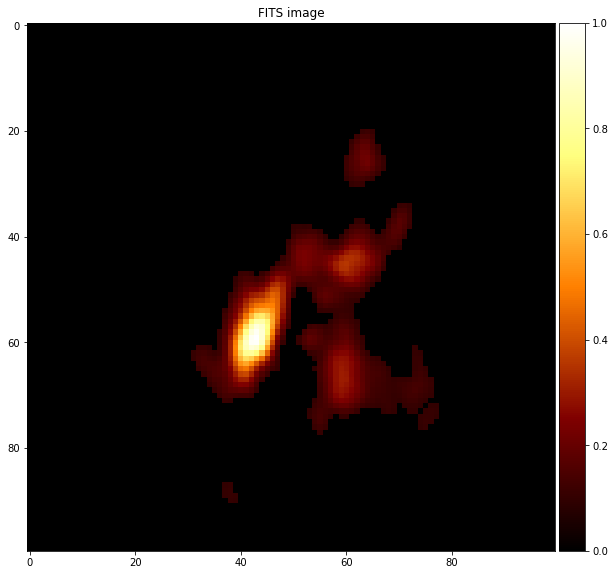

In [116]:
new = np.where(data > RMS(data), data, 0)
image_plot(new)

### Paso 3)

Crear la función
```python
def apply_filter(data, mask, kernel_filter):
    ...
    return None
```
Que reciba el arreglo de datos completo `data`, el arreglo booleano con los __pixeles usables__ `mask` (sobre el RMS), y kernel de filtro de `3x3`. La función debe convolucionar `filter` sobre la imagen `data`, sólo en los pixeles usables. La función no debe retornar nada, pero debe modificar `data` de forma _in place_ (sin generar copias de el mismo).

Finalmente mostrar el resultado de convolucionar tal filtro en `data` (mostrar imágen).

__Nota:__ Debe usar siempre que pueda _instrucciones vectorizadas_ y operaciones _inplace_.

__Image convolution:__ https://en.wikipedia.org/wiki/Kernel_(image_processing)#Convolution

In [6]:
# Gaussian blur filter: Ocupar este filtro!
kernel_filter = np.array([[1,2,1], [2,4,2], [1,2,1]]) * 1./16. 

In [119]:
def id(x):
    # This function returns the memory
    # block address of an array.
    return x.__array_interface__['data'][0]

In [114]:
def apply_filter(data, mask, kernel_filter):
    kernel_filter.ravel()[::-1]

image_plot(apply_filter(data > RMS(data), , kernel_filter))

SyntaxError: invalid syntax (<ipython-input-114-6d788156f426>, line 4)

In [104]:
a=np.array([1,2,3,4])
print(np.dot(a[::-1],a))

20


In [12]:
b=np.array([[ 1, 2, 3, 4],
            [ 5, 6, 7, 8],
            [ 9,10,11,12],
            [13,14,15,16]])

m=np.array([[ 0, 0, 0, 0],
            [ 0, 0, 1, 0],
            [ 0, 1, 0, 0],
            [ 0, 0, 0, 0]])
print(kernel_filter.ravel()[::-1])
np.dot(b[0:3,1:4].ravel(), kernel_filter.ravel()[::-1])

[ 0.0625  0.125   0.0625  0.125   0.25    0.125   0.0625  0.125   0.0625]


7.0

In [ ]:
c = np.array([])